# Calgary Crime Data Analysis (2018-2024)

## Objective
To analyze trends, patterns, and distributions in reported crimes across Calgary between 2018 and 2024 using open-source data. The goal is to extract meaningful insights about crime types, hotspots, and temporal variations.

Specifically below are some of the questions I wish to answer from this analysis:
- what types of crimes are most prevalent in Calgary
- what has been the overall trend of total crime in Calgary, does this vary depending on the type of crime?
- which communities report the most crime and which report the least?

## About Datasource
The data used in this analysis was obtained from the Calgary Police's Community Crime and Disorder Statistics, obtained from this link - https://www.calgary.ca/cps/statistics/calgary-police-statistical-reports.html.

Fields:
- CommunityName
- Category
- Dates: 2018-2024 Jan-Dec etc

Note: The workbook used in this analysis includes community crime data as well as disorder data. For context, this is explained in detail below:
In the Calgary Police Service (CPS) dataset, the term "Disorder" refers to specific Calls for Service (CFS) that, while not classified as criminal offenses, significantly impact public perceptions of safety and community well-being. "Disorder" encompasses non-criminal incidents reported to the CPS that indicate social or physical disturbances within the community. These incidents are often highly visible and occur in public spaces, contributing to a sense of unease among residents. Examples include: Public intoxication, Panhandling, Youth gangs, Prostitution, Littering, Loitering, Graffiti. The CPS monitors these types of calls to assess and address factors that may not be criminal but still affect the quality of life in Calgary communities. 

More information can be obtained here - https://data.calgary.ca/Health-and-Safety/Community-Disorder-Statistics/h3h6-kgme/about_data

For the purposes of this analysis, I will analyse both Community Crime and Disorder data separately.

## Table of Contents:
1. [Loading the Dataset](#1.-Loading-the-Dataset)
2. [Data Cleaning and Preparation](#2.-Data-Cleaning-and-Preparation)
3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)

## 1. Loading the Dataset

Import the relevant libraries for analysis and EDA

In [39]:
# Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# load the dataset (use rows 1 and 2 (index 0 and 1) as multi-level column headers)
df = pd.read_excel('2024 Community Crime and Disorder Statistics.xls', header =[0,1])

# preview the first few rows
df.head()

CommunityName                          Category 2018                 \
  Unnamed: 0_level_1                Unnamed: 1_level_1  JAN  FEB  MAR  APR   
0          ABBEYDALE            Assault (Non-domestic)  1.0  1.0  1.0  NaN   
1          ABBEYDALE                Commercial Robbery  NaN  NaN  NaN  NaN   
2          ABBEYDALE                    Street Robbery  NaN  NaN  1.0  NaN   
3          ABBEYDALE  Violence  'Other' (Non-domestic)  NaN  NaN  1.0  NaN   
4          ABBEYDALE          Break & Enter - Dwelling  NaN  NaN  3.0  2.0   

                       ... 2024                                              
   MAY  JUN  JUL  AUG  ...  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV DEC  
0  2.0  NaN  1.0  NaN  ...  1.0  1.0  3.0  NaN  2.0  1.0  4.0  1.0  2.0 NaN  
1  NaN  1.0  1.0  NaN  ...  NaN  NaN  NaN  1.0  NaN  NaN  NaN  3.0  NaN NaN  
2  NaN  NaN  1.0  NaN  ...  NaN  NaN  1.0  NaN  NaN  NaN  1.0  1.0  NaN NaN  
3  NaN  3.0  1.0  1.0  ...  NaN  1.0  1.0  NaN  2.0  NaN  2.0  NaN  NaN NaN  
4  1.0  NaN  NaN  1.0  ...  1.0  1.0  NaN  NaN  2.0  NaN  1.0  NaN  NaN NaN  

[5 rows x 86 columns]

## 2. Data Cleaning and Preparation

### Fixing Column Headers

As the Excel sheet is formatted with two rows as headers, I will first prepare the column headings so they are appropriate and useful for analysis.

In [41]:
# inspect how the columns look after the data is loaded with multi-level headers
df.columns.to_list()

[('CommunityName', 'Unnamed: 0_level_1'),
 ('Category', 'Unnamed: 1_level_1'),
 (2018, 'JAN'),
 (2018, 'FEB'),
 (2018, 'MAR'),
 (2018, 'APR'),
 (2018, 'MAY'),
 (2018, 'JUN'),
 (2018, 'JUL'),
 (2018, 'AUG'),
 (2018, 'SEP'),
 (2018, 'OCT'),
 (2018, 'NOV'),
 (2018, 'DEC'),
 (2019, 'JAN'),
 (2019, 'FEB'),
 (2019, 'MAR'),
 (2019, 'APR'),
 (2019, 'MAY'),
 (2019, 'JUN'),
 (2019, 'JUL'),
 (2019, 'AUG'),
 (2019, 'SEP'),
 (2019, 'OCT'),
 (2019, 'NOV'),
 (2019, 'DEC'),
 (2020, 'JAN'),
 (2020, 'FEB'),
 (2020, 'MAR'),
 (2020, 'APR'),
 (2020, 'MAY'),
 (2020, 'JUN'),
 (2020, 'JUL'),
 (2020, 'AUG'),
 (2020, 'SEP'),
 (2020, 'OCT'),
 (2020, 'NOV'),
 (2020, 'DEC'),
 (2021, 'JAN'),
 (2021, 'FEB'),
 (2021, 'MAR'),
 (2021, 'APR'),
 (2021, 'MAY'),
 (2021, 'JUN'),
 (2021, 'JUL'),
 (2021, 'AUG'),
 (2021, 'SEP'),
 (2021, 'OCT'),
 (2021, 'NOV'),
 (2021, 'DEC'),
 (2022, 'JAN'),
 (2022, 'FEB'),
 (2022, 'MAR'),
 (2022, 'APR'),
 (2022, 'MAY'),
 (2022, 'JUN'),
 (2022, 'JUL'),
 (2022, 'AUG'),
 (2022, 'SEP'),
 (2022, '

In [42]:
# flatten the multi-level column names by joining them, ensuring everything is converted to string
df.columns = [' '.join(map(str,col)).strip() for col in df.columns.values]

# rename the first two columns manually
df.columns = ['CommunityName', 'Category'] + df.columns[2:].tolist()

# check the updated column names
df.columns

Index(['CommunityName', 'Category', '2018 JAN', '2018 FEB', '2018 MAR',
       '2018 APR', '2018 MAY', '2018 JUN', '2018 JUL', '2018 AUG', '2018 SEP',
       '2018 OCT', '2018 NOV', '2018 DEC', '2019 JAN', '2019 FEB', '2019 MAR',
       '2019 APR', '2019 MAY', '2019 JUN', '2019 JUL', '2019 AUG', '2019 SEP',
       '2019 OCT', '2019 NOV', '2019 DEC', '2020 JAN', '2020 FEB', '2020 MAR',
       '2020 APR', '2020 MAY', '2020 JUN', '2020 JUL', '2020 AUG', '2020 SEP',
       '2020 OCT', '2020 NOV', '2020 DEC', '2021 JAN', '2021 FEB', '2021 MAR',
       '2021 APR', '2021 MAY', '2021 JUN', '2021 JUL', '2021 AUG', '2021 SEP',
       '2021 OCT', '2021 NOV', '2021 DEC', '2022 JAN', '2022 FEB', '2022 MAR',
       '2022 APR', '2022 MAY', '2022 JUN', '2022 JUL', '2022 AUG', '2022 SEP',
       '2022 OCT', '2022 NOV', '2022 DEC', '2023 JAN', '2023 FEB', '2023 MAR',
       '2023 APR', '2023 MAY', '2023 JUN', '2023 JUL', '2023 AUG', '2023 SEP',
       '2023 OCT', '2023 NOV', '2023 DEC', '2024 JAN', '202

In [43]:
# preview data again
df.head()

,CommunityName,Category,2018 JAN,2018 FEB,2018 MAR,2018 APR,2018 MAY,2018 JUN,2018 JUL,2018 AUG,...,2024 MAR,2024 APR,2024 MAY,2024 JUN,2024 JUL,2024 AUG,2024 SEP,2024 OCT,2024 NOV,2024 DEC
0,ABBEYDALE,Assault (Non-domestic),1.0,1.0,1.0,NaN,2.0,NaN,1.0,NaN,...,1.0,1.0,3.0,NaN,2.0,1.0,4.0,1.0,2.0,NaN
1,ABBEYDALE,Commercial Robbery,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.0,NaN,NaN
2,ABBEYDALE,Street Robbery,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
3,ABBEYDALE,Violence 'Other' (Non-domestic),NaN,NaN,1.0,NaN,NaN,3.0,1.0,1.0,...,NaN,1.0,1.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN
4,ABBEYDALE,Break & Enter - Dwelling,NaN,NaN,3.0,2.0,1.0,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN


The column headings have been fixed. Now I will move on to cleaning the rest of the data.

### Missing Values

In [44]:
# check basic information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 86 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CommunityName  3070 non-null   object 
 1   Category       3070 non-null   object 
 2   2018 JAN       1175 non-null   float64
 3   2018 FEB       1116 non-null   float64
 4   2018 MAR       1152 non-null   float64
 5   2018 APR       1188 non-null   float64
 6   2018 MAY       1258 non-null   float64
 7   2018 JUN       1249 non-null   float64
 8   2018 JUL       1275 non-null   float64
 9   2018 AUG       1306 non-null   float64
 10  2018 SEP       1269 non-null   float64
 11  2018 OCT       1270 non-null   float64
 12  2018 NOV       1219 non-null   float64
 13  2018 DEC       1198 non-null   float64
 14  2019 JAN       1227 non-null   float64
 15  2019 FEB       1090 non-null   float64
 16  2019 MAR       1149 non-null   float64
 17  2019 APR       1203 non-null   float64
 18  2019 MAY

,2018 JAN,2018 FEB,2018 MAR,2018 APR,2018 MAY,2018 JUN,2018 JUL,2018 AUG,2018 SEP,2018 OCT,...,2024 MAR,2024 APR,2024 MAY,2024 JUN,2024 JUL,2024 AUG,2024 SEP,2024 OCT,2024 NOV,2024 DEC
count,1175.000000,1116.000000,1152.000000,1188.000000,1258.000000,1249.000000,1275.000000,1306.000000,1269.000000,1270.000000,...,1053.000000,1102.000000,1151.000000,1110.000000,1129.000000,1165.000000,1210.000000,1217.000000,1138.000000,1120.000000
mean,7.816170,7.152330,8.047743,8.268519,9.089825,8.948759,9.763137,9.318530,8.388495,8.279528,...,7.203229,7.250454,7.827976,7.907207,8.345438,8.090987,7.923967,7.479869,7.160808,7.319643
std,24.771052,24.072762,27.418695,27.395898,28.332283,28.197403,31.581477,27.060051,24.594976,26.370784,...,26.478568,25.741870,28.882219,26.680243,29.106178,27.109178,31.048682,29.140085,29.373277,31.302319
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,6.000000,5.000000,5.250000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,4.000000,4.000000,5.000000,4.750000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,543.000000,556.000000,622.000000,576.000000,621.000000,649.000000,782.000000,576.000000,565.000000,631.000000,...,532.000000,580.000000,676.000000,596.000000,703.000000,687.000000,834.000000,740.000000,703.000000,672.000000


In [45]:
# check for missing values
df.isnull().sum()

CommunityName     306
Category          306
2018 JAN         2201
2018 FEB         2260
2018 MAR         2224
2018 APR         2188
2018 MAY         2118
2018 JUN         2127
2018 JUL         2101
2018 AUG         2070
2018 SEP         2107
2018 OCT         2106
2018 NOV         2157
2018 DEC         2178
2019 JAN         2149
2019 FEB         2286
2019 MAR         2227
2019 APR         2173
2019 MAY         2141
2019 JUN         2114
2019 JUL         2082
2019 AUG         2041
2019 SEP         2032
2019 OCT         2118
2019 NOV         2125
2019 DEC         2163
2020 JAN         2153
2020 FEB         2142
2020 MAR         2213
2020 APR         2239
2020 MAY         2323
2020 JUN         2246
2020 JUL         2187
2020 AUG         2140
2020 SEP         2148
2020 OCT         2166
2020 NOV         2217
2020 DEC         2291
2021 JAN         2245
2021 FEB         2331
2021 MAR         2271
2021 APR         2236
2021 MAY         2241
2021 JUN         2194
2021 JUL         2167
2021 AUG  

The dataframe has null values in the CommunityName / Category columns. These refer to blank rows (as they are not associated with any community or category) and therefore will be removed. The null values present in the date columns refer to instances where no crime was associated with the specified communityname and category in that date. Therefore, these will be changed from Null to 0 to enable data analysis. 

In [46]:
# drop rows where communityname is null
df.dropna(subset=['CommunityName'],inplace=True)

# identify the columns that correspond to months (i.e., the columns starting from '2018 Jan' to '2024 Dec')
month_columns = df.columns[2:]  # The first two columns are 'CommunityName' and 'Category'

# fill missing values in the month columns with 0
df[month_columns] = df[month_columns].fillna(0)

# verify the changes
df.isnull().sum()

CommunityName    0
Category         0
2018 JAN         0
2018 FEB         0
2018 MAR         0
2018 APR         0
2018 MAY         0
2018 JUN         0
2018 JUL         0
2018 AUG         0
2018 SEP         0
2018 OCT         0
2018 NOV         0
2018 DEC         0
2019 JAN         0
2019 FEB         0
2019 MAR         0
2019 APR         0
2019 MAY         0
2019 JUN         0
2019 JUL         0
2019 AUG         0
2019 SEP         0
2019 OCT         0
2019 NOV         0
2019 DEC         0
2020 JAN         0
2020 FEB         0
2020 MAR         0
2020 APR         0
2020 MAY         0
2020 JUN         0
2020 JUL         0
2020 AUG         0
2020 SEP         0
2020 OCT         0
2020 NOV         0
2020 DEC         0
2021 JAN         0
2021 FEB         0
2021 MAR         0
2021 APR         0
2021 MAY         0
2021 JUN         0
2021 JUL         0
2021 AUG         0
2021 SEP         0
2021 OCT         0
2021 NOV         0
2021 DEC         0
2022 JAN         0
2022 FEB         0
2022 MAR    

### Reshaping the Data

As the data provided has dates along the column headers, the dataframe will need to be reframed from a wide format to long format to allow for easier grouping, aggregation, plotting, etc.

In [47]:
# reshape the data from wide format to long format
df_melted = df.melt(
    id_vars = ['CommunityName','Category'],  # these columns stay the same
    var_name = 'Date',                       # new column name for old col headers (eg '2018 Jan', etc.)
    value_name = 'Crime Count'               # new column name for the actual values (e.g. 1,2,45, etc.)
)

df_melted.head()

,CommunityName,Category,Date,Crime Count
0,ABBEYDALE,Assault (Non-domestic),2018 JAN,1.0
1,ABBEYDALE,Commercial Robbery,2018 JAN,0.0
2,ABBEYDALE,Street Robbery,2018 JAN,0.0
3,ABBEYDALE,Violence 'Other' (Non-domestic),2018 JAN,0.0
4,ABBEYDALE,Break & Enter - Dwelling,2018 JAN,0.0


In [48]:
# convert date column to datetime
df_melted['Date'] = pd.to_datetime(df_melted['Date'], format='%Y %b') # note: %Y is the 4-digit year (eg 2018) and %b is abbreviated month (eg Jan)
df_melted.dtypes

CommunityName            object
Category                 object
Date             datetime64[ns]
Crime Count             float64
dtype: object

### Separating 'Disorder' from 'Crimes'

As outlined at the top of the notebook, 'Disorder' encompasses non-criminal incidents reported to the CPS, while the remaining categories represent Community Crime events. Due to the nature of these incidents being different, it is crucial to separate the analysis.

By distinguishing between crime and disorder, my analysis will provide a more nuanced understanding of community safety and the various factors that influence it. 

In [49]:
# Preview the unique categories
df_melted['Category'].unique()

array(['Assault (Non-domestic)', 'Commercial Robbery', 'Street Robbery',
       "Violence\xa0 'Other' (Non-domestic)", 'Break & Enter - Dwelling',
       'Break & Enter - Commercial', 'Break & Enter - Other Premises',
       'Theft OF Vehicle', 'Theft FROM Vehicle', 'Disorder'], dtype=object)

Note the category "Violence\xa0 'Other' (Non-domestic)". The character '\xa0' is a non-breaking character and needs to be removed.

In [50]:
# Replace all non-breaking spaces (\xa0) with regular spaces in 'Category' column
df_melted['Category'] = df_melted['Category'].str.replace('\xa0', '', regex=False)
# trim extra white spaces
df_melted['Category'] = df_melted['Category'].str.strip()

df_melted['Category'].unique()

array(['Assault (Non-domestic)', 'Commercial Robbery', 'Street Robbery',
       "Violence 'Other' (Non-domestic)", 'Break & Enter - Dwelling',
       'Break & Enter - Commercial', 'Break & Enter - Other Premises',
       'Theft OF Vehicle', 'Theft FROM Vehicle', 'Disorder'], dtype=object)

In [51]:
# create separate dataframes - one for disorder data and one for crime data

# Create two new DataFrames
disorder_df = df_melted[df_melted['Category'].str.contains('Disorder', case=False, na=False)]
crime_df = df_melted[~df_melted['Category'].str.contains('Disorder', case=False, na=False)]

In [52]:
# check the disorder_df
disorder_df.head()

,CommunityName,Category,Date,Crime Count
9,ABBEYDALE,Disorder,2018-01-01,22.0
19,ACADIA,Disorder,2018-01-01,95.0
29,ALBERT PARK/RADISSON HEIGHTS,Disorder,2018-01-01,102.0
39,ALPINE PARK,Disorder,2018-01-01,0.0
49,ALTADORE,Disorder,2018-01-01,21.0


In [53]:
disorder_df['Category'].unique()

array(['Disorder'], dtype=object)

In [54]:
# check the crime_df
crime_df.head()

,CommunityName,Category,Date,Crime Count
0,ABBEYDALE,Assault (Non-domestic),2018-01-01,1.0
1,ABBEYDALE,Commercial Robbery,2018-01-01,0.0
2,ABBEYDALE,Street Robbery,2018-01-01,0.0
3,ABBEYDALE,Violence 'Other' (Non-domestic),2018-01-01,0.0
4,ABBEYDALE,Break & Enter - Dwelling,2018-01-01,0.0


In [55]:
crime_df['Category'].unique()

array(['Assault (Non-domestic)', 'Commercial Robbery', 'Street Robbery',
       "Violence 'Other' (Non-domestic)", 'Break & Enter - Dwelling',
       'Break & Enter - Commercial', 'Break & Enter - Other Premises',
       'Theft OF Vehicle', 'Theft FROM Vehicle'], dtype=object)

## 3. Exploratory Data Analysis

### Crime Trend Over Time

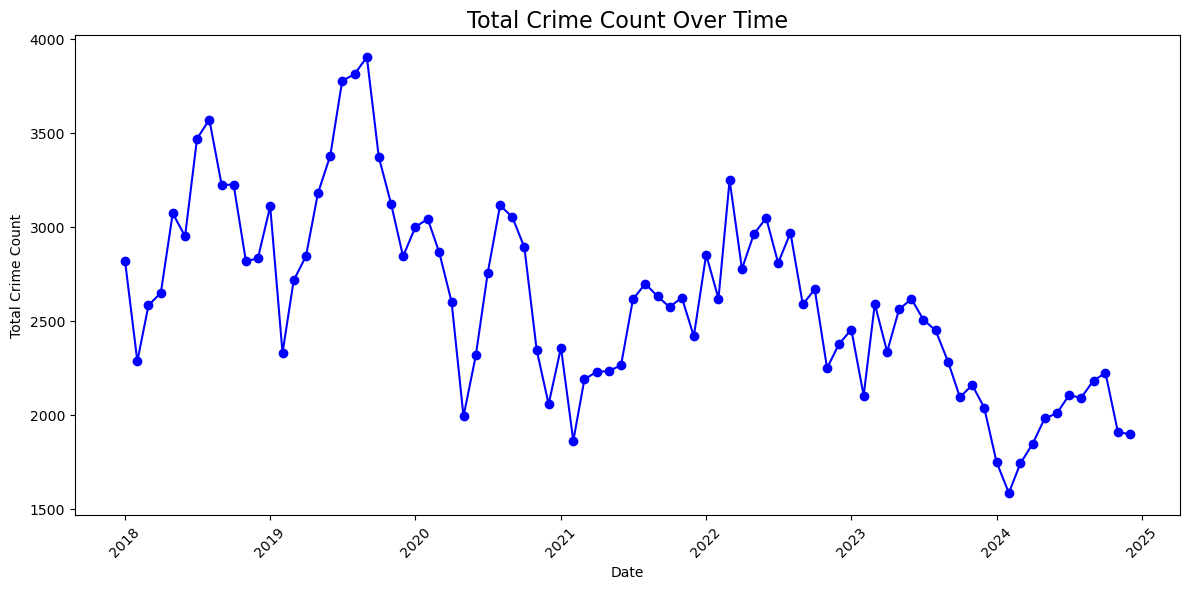

In [74]:
# group by 'Date' and sum the 'Crime Count' for each date (reset_index() helps ensure the Date column remains a regular column not index)
df_grouped = crime_df.groupby('Date')['Crime Count'].sum().reset_index()

plt.figure(figsize=(12, 6))  # sets the size of the plot (12 inches by 6 inches)
plt.plot(df_grouped['Date'], df_grouped['Crime Count'], marker='o', linestyle='-', color='b')  # plots the line
plt.title('Total Crime Count Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Crime Count')
plt.xticks(rotation=45)     # rotate the x-axis labels by 45 degrees for better readability
plt.tight_layout()          # automatically adjusts plot to ensure everything fits nicely
plt.show()

#### Observation: 

Evidently, there is seasonality in this data as we can see the crime count peaks during summer months (May - August) and drops during winter months (November - February). This is expected in such data as warmer weather increases social activity and foot traffic which in turn can lead to increased disturbances in outdoor gatherings and more opportunities for crime. 

Another interesting observation is the drop in crime in the years 2020 - 2022. This can most likely be attributed to the impact of the lockdowns due to Covid-19 pandemic. This is reflective of the reduced mobility, business closures and significantly less public events and outdoor gatherings which lead to fewer crime occurrences. 

After a slight rise in 2022, there is again a reduction in crime count consistently until 2024, with a historical low of 1748 for Jan 2024. This is interesting, and the reasons behind this could be ongoing social shifts in the country, e.g. with policy and economic changes.

It will be interesting to dive deeper by analyzing the trend per crime category to identify whether this is common across all categories or only some.

### Crime Trend Over Time - Per Category

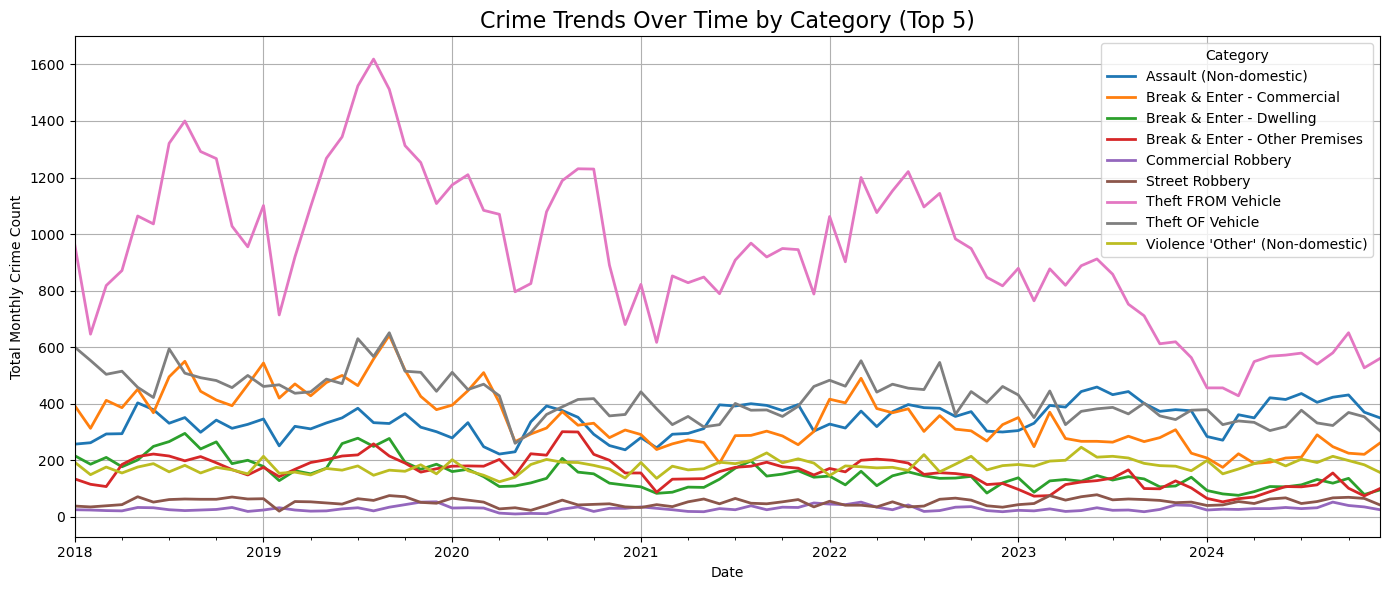

In [57]:
# group by 'Date' and 'Category', sum the 'Crime Count' for each (reset_index() helps ensure the Date column remains a regular column not index)
crime_trends = crime_df.groupby(['Date', 'Category'])['Crime Count'].sum().reset_index()
# pivot the table for plotting purposes
pivot_df = crime_trends.pivot(index='Date', columns='Category', values='Crime Count')
pivot_df.plot(figsize=(14, 6), linewidth=2)
plt.title('Crime Trends Over Time by Category (Top 5)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Monthly Crime Count')
plt.grid(True)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

#### Observation:

The most highly frequent crime category in Calgary has consistently been 'Theft FROM Vehicle' from 2018 to 2024. The trend of decreasing crime rate observed in the previous chart is most evidently visible in the 'Theft FROM Vehicle' category with the lowest crime count occurring in 2024. The least crime count remains mostly for 'Commercial Robbery', indicating low levels of of type of crime within Calgary. 

Crime count for the remaining crime categories remain mostly consistent throughout the years, with a slight reduction evident from 2018-2024, though not as drastic as for the 'Theft FROM Vehicle' category. 

### Crime by Category

Category
Theft FROM Vehicle                 78293.0
Theft OF Vehicle                   35527.0
Assault (Non-domestic)             28865.0
Break & Enter - Commercial         28755.0
Violence 'Other' (Non-domestic)    15032.0
Break & Enter - Other Premises     13165.0
Break & Enter - Dwelling           12712.0
Street Robbery                      4351.0
Commercial Robbery                  2423.0
Name: Crime Count, dtype: float64


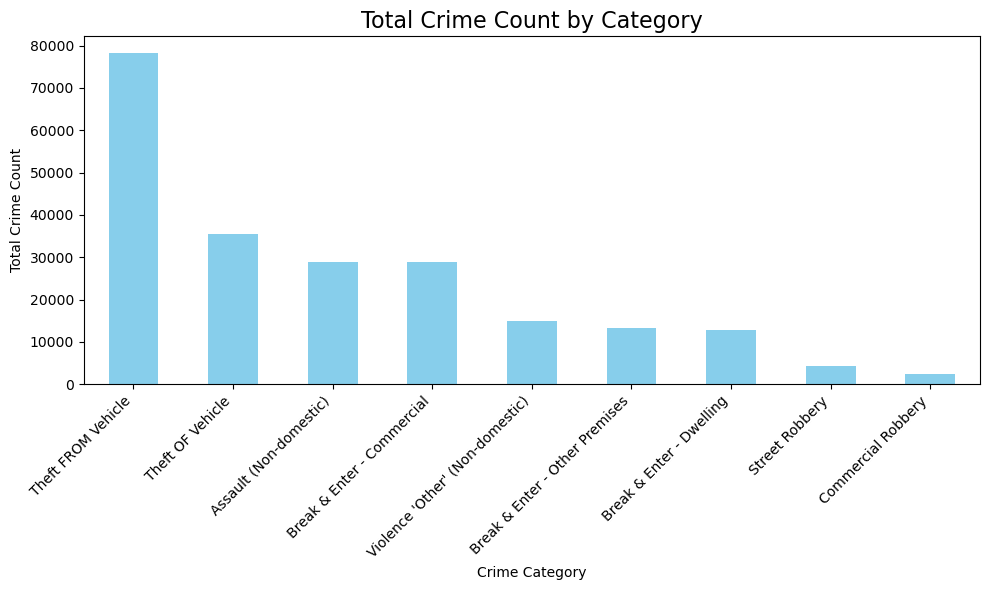

In [75]:
# group by 'Category' and sum the 'Crime Count' for each category (sort from highest total crime count to lowest)
category_counts = crime_df.groupby('Category')['Crime Count'].sum().sort_values(ascending=False)
print(category_counts)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Total Crime Count by Category', fontsize=16)
plt.xlabel('Crime Category')
plt.ylabel('Total Crime Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Observation:

Theft FROM Vehicle is the most prevalent crime in Calgary from 2018–2024, far exceeding other crime types. This may be due to a high number of cars parked outdoors, theft of valuables left in vehicles, or lack of security measures in public areas. Vehicle-related crimes as a whole dominate the landscape, pointing to a significant vulnerability in public and residential parking environments.

Non-domestic assaults and break-and-enters are also widespread, indicating persistent issues with violence and property intrusion.

Robberies occur less frequently but are critical due to their direct impact on individuals and businesses. These patterns highlight the need for targeted preventive measures tailored to crime type and context.

### Crime in Different Communities

CommunityName
BELTLINE                    10967.0
DOWNTOWN COMMERCIAL CORE     7768.0
FOREST LAWN                  3459.0
BOWNESS                      2721.0
MANCHESTER INDUSTRIAL        2629.0
MARLBOROUGH                  2550.0
SUNRIDGE                     2465.0
CRESCENT HEIGHTS             2362.0
DOVER                        2345.0
BRIDGELAND/RIVERSIDE         2327.0
Name: Crime Count, dtype: float64


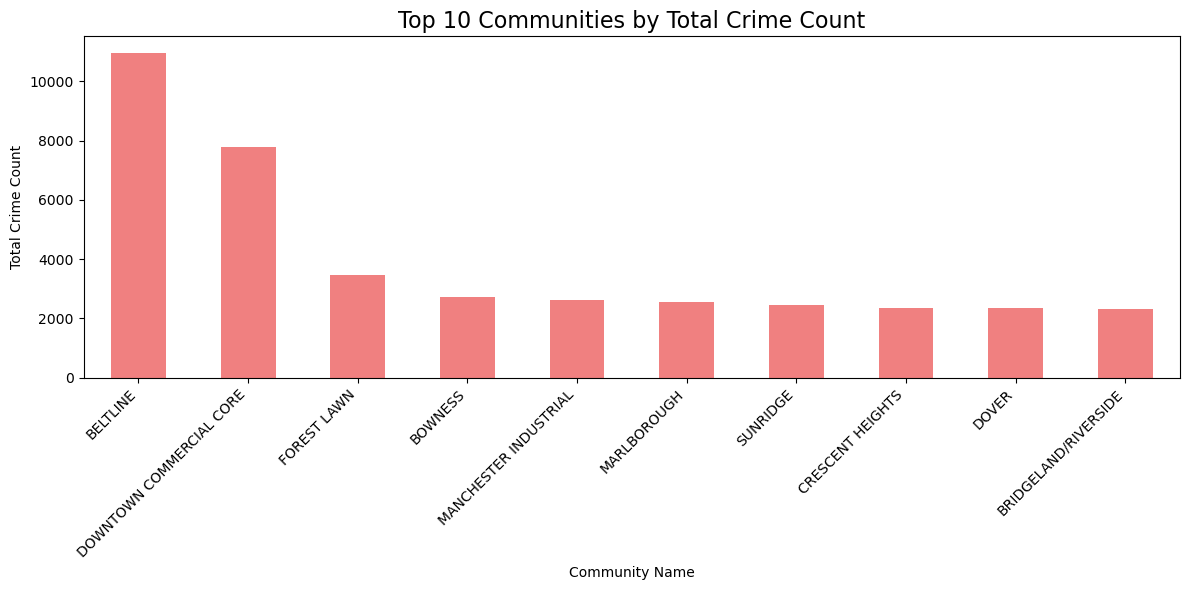

In [77]:
# group by community and sum crime count for each community (from highest total crime count to lowest)
community_counts = crime_df.groupby('CommunityName')['Crime Count'].sum().sort_values(ascending=False).head(10)
print(community_counts)

plt.figure(figsize=(12, 6))
community_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Communities by Total Crime Count', fontsize=16)
plt.xlabel('Community Name')
plt.ylabel('Total Crime Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Observation:
Urban neighborhoods like Beltline and Downtown Commercial Core lead in total crime incidents, likely due to their density, nightlife, and commercial activity.

Industrial areas such as Manchester Industrial also rank high despite low residential presence, suggesting a focus on property-related crimes. 

Communities such as Forest Lawn and Bowness appear consistently in the top due to a combination of socioeconomic factors and public disorder. These patterns reflect the varying nature of crime drivers across Calgary's landscape and underscore the importance of localized strategies in community policing.

It would be interesting to dive deep into the crime categories which dominate different communities.

### Crime By Type Per Community

In [80]:
# Pivot the data
pivot_df = crime_df.pivot_table(
    index='CommunityName',
    columns='Category',
    values='Crime Count',
    aggfunc='sum',
    fill_value=0
)

# Optional: Add a total column and sort
pivot_df['Total Crime'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values('Total Crime', ascending=False)

pivot_df.head()

Category,Assault (Non-domestic),Break & Enter - Commercial,Break & Enter - Dwelling,Break & Enter - Other Premises,Commercial Robbery,Street Robbery,Theft FROM Vehicle,Theft OF Vehicle,Violence 'Other' (Non-domestic),Total Crime
CommunityName,,,,,,,,,,
BELTLINE,2595.0,2207.0,204.0,72.0,150.0,305.0,3820.0,850.0,764.0,10967.0
DOWNTOWN COMMERCIAL CORE,2490.0,1256.0,88.0,18.0,85.0,376.0,2388.0,424.0,643.0,7768.0
FOREST LAWN,871.0,244.0,187.0,211.0,36.0,150.0,771.0,705.0,284.0,3459.0
BOWNESS,585.0,240.0,147.0,207.0,19.0,47.0,763.0,457.0,256.0,2721.0
MANCHESTER INDUSTRIAL,368.0,718.0,8.0,16.0,45.0,69.0,815.0,486.0,104.0,2629.0


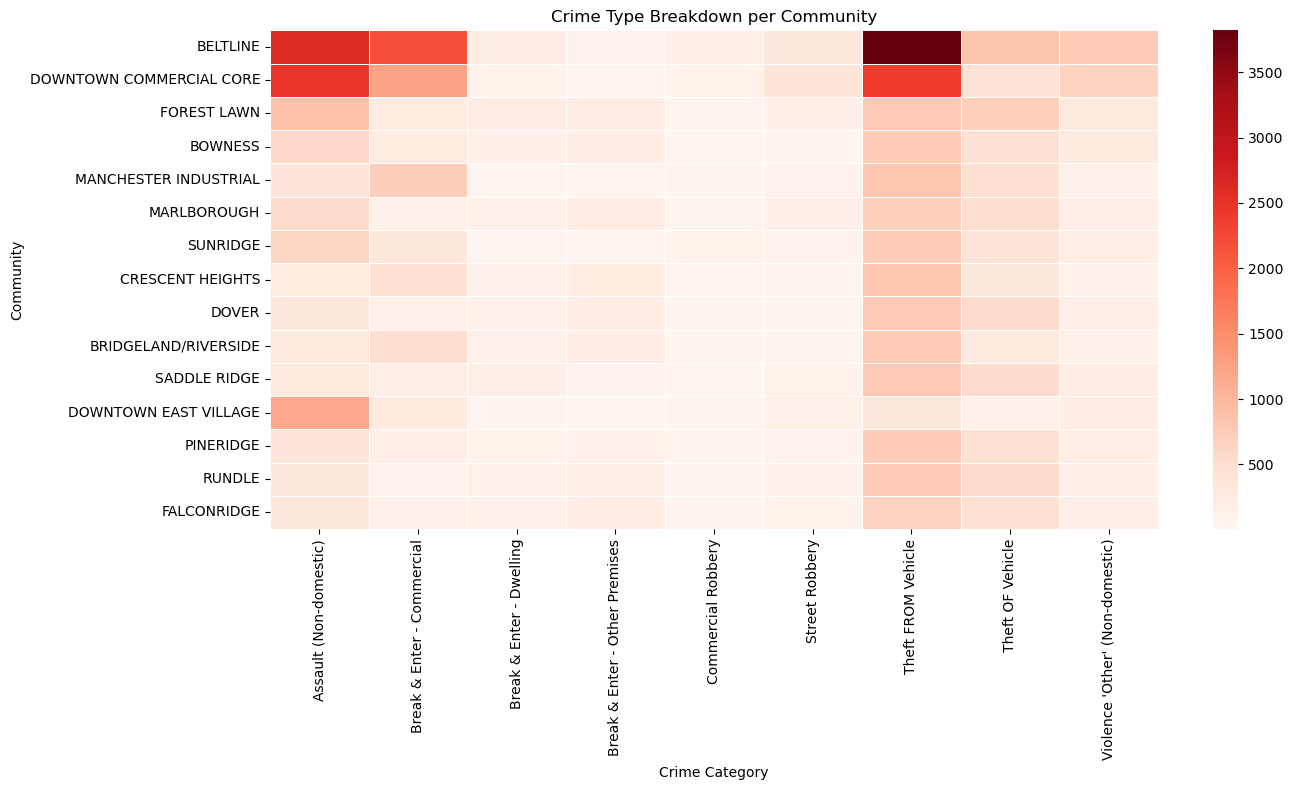

In [138]:
plt.figure(figsize=(14, 8))
top10 = pivot_df.sort_values('Total Crime', ascending=False).head(15)
sns.heatmap(top10.drop(columns='Total Crime'), cmap='Reds', linewidths=0.5)
plt.title("Crime Type Breakdown per Community")
plt.xlabel("Crime Category")
plt.ylabel("Community")
plt.tight_layout()
plt.show()

#### Observation: 

Theft FROM Vehicle is the most frequent crime category in Beltine, followed by non-domestic assault, and commercial break and enter. For Downtown commercial core and downtown east village, non-domestic assault is more common. This heatmap provides an interesting visualization and shows that different communities have different categories of crime. 

### Crime on Weekdays vs Weekends & Public Holidays

In [142]:
# extract day of week
crime_df.loc[:,'DayOfWeek'] = crime_df['Date'].dt.dayofweek  # Monday=0, Sunday=6
# classify as weekday or weekend
crime_df.loc[:,'DayType'] = crime_df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
crime_df.head()

,CommunityName,Category,Date,Crime Count,Year,DayOfWeek
0,ABBEYDALE,Assault (Non-domestic),2018-01-01,1.0,2018,0
1,ABBEYDALE,Commercial Robbery,2018-01-01,0.0,2018,0
2,ABBEYDALE,Street Robbery,2018-01-01,0.0,2018,0
3,ABBEYDALE,Violence 'Other' (Non-domestic),2018-01-01,0.0,2018,0
4,ABBEYDALE,Break & Enter - Dwelling,2018-01-01,0.0,2018,0


In [145]:
# get list of dates which are public holiday from 2018-2024
holidays_df = pd.read_excel('publicHolidays.xlsx')
holidays_df.head()

,Date,Public Holiday,Note
0,2018-01-01,New Year's Day,NaN
1,2018-02-19,Family Day,NaN
2,2018-03-30,Good Friday,NaN
3,2018-04-02,Easter Monday,Optional
4,2018-05-21,Victoria Day,NaN


In [147]:
# Flag if the crime date is a public holiday
crime_df.loc[:,'IsHoliday'] = crime_df['Date'].isin(holidays_df['Date'])
crime_df.head()

,CommunityName,Category,Date,Crime Count,Year,DayOfWeek,DayType,IsHoliday
0,ABBEYDALE,Assault (Non-domestic),2018-01-01,1.0,2018,0,Weekday,True
1,ABBEYDALE,Commercial Robbery,2018-01-01,0.0,2018,0,Weekday,True
2,ABBEYDALE,Street Robbery,2018-01-01,0.0,2018,0,Weekday,True
3,ABBEYDALE,Violence 'Other' (Non-domestic),2018-01-01,0.0,2018,0,Weekday,True
4,ABBEYDALE,Break & Enter - Dwelling,2018-01-01,0.0,2018,0,Weekday,True


In [150]:
# New column combining DayType and Holiday flag
def classify_day(row):
    if row['IsHoliday']:
        return 'Public Holiday'
    else:
        return row['DayType']

crime_df.loc[:,'FinalDayType'] = crime_df.apply(classify_day, axis=1)

In [154]:
# Full calendar from Jan 1, 2018 to last date in crime data
full_dates = pd.date_range(start='2018-01-01', end=df_melted['Date'].max())

# Create a DataFrame of all dates
calendar_df = pd.DataFrame({'Date': full_dates})

# Day of week (0=Monday, 6=Sunday)
calendar_df['DayOfWeek'] = calendar_df['Date'].dt.dayofweek

# Weekday/Weekend classification
calendar_df['DayType'] = calendar_df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Public Holiday Flag
calendar_df['IsHoliday'] = calendar_df['Date'].isin(holidays_df['Date'])

# FinalDayType: Public Holiday overrides Weekday/Weekend
calendar_df['FinalDayType'] = calendar_df.apply(lambda row: 'Public Holiday' if row['IsHoliday'] else row['DayType'], axis=1)

# Count of total days per type
day_counts = calendar_df['FinalDayType'].value_counts().reset_index()
day_counts.columns = ['FinalDayType', 'NumDays']

print(day_counts)

     FinalDayType  NumDays
0         Weekday     1730
1         Weekend      711
2  Public Holiday       86


In [155]:
calendar_df.head()

,Date,DayOfWeek,DayType,IsHoliday,FinalDayType
0,2018-01-01,0,Weekday,True,Public Holiday
1,2018-01-02,1,Weekday,False,Weekday
2,2018-01-03,2,Weekday,False,Weekday
3,2018-01-04,3,Weekday,False,Weekday
4,2018-01-05,4,Weekday,False,Weekday


In [157]:
crime_counts = df_melted.groupby('FinalDayType')['Crime Count'].sum().reset_index()
summary_df = pd.merge(crime_counts, day_counts, on='FinalDayType')
summary_df['AvgCrimesPerDay'] = summary_df['Crime Count'] / summary_df['NumDays']
summary_df.head()

,FinalDayType,Crime Count,NumDays,AvgCrimesPerDay
0,Public Holiday,160005.0,86,1860.523256
1,Weekday,472792.0,1730,273.290173
2,Weekend,189297.0,711,266.240506


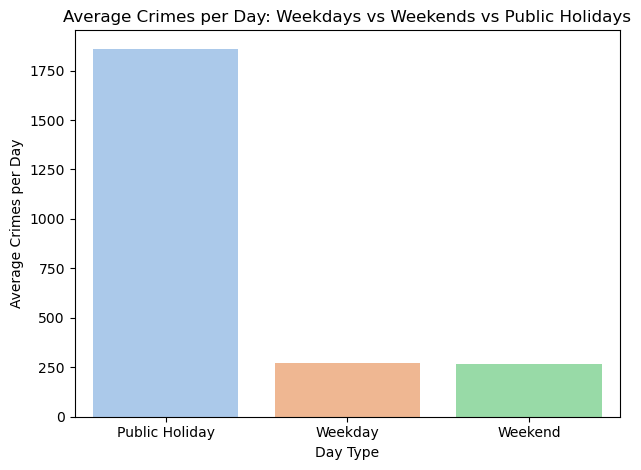

In [158]:
# Bar plot of average crimes per day
sns.barplot(x='FinalDayType', y='AvgCrimesPerDay', data=summary_df, palette='pastel', hue='FinalDayType', legend=False)

plt.title('Average Crimes per Day: Weekdays vs Weekends vs Public Holidays')
plt.ylabel('Average Crimes per Day')
plt.xlabel('Day Type')
plt.tight_layout()
plt.show()

#### Observation:
On average 